In [10]:
import pandas as pd
import datetime as dt
import numpy as np
import mariadb
import os
from dotenv import load_dotenv
import sqlalchemy

load_dotenv() 

True

In [11]:
start_time=dt.datetime(2022,1,1,6,00,00)
# the local timezone
tz='Europe/Berlin'

mydb = mariadb.connect(
    host = os.getenv('HOST'),
    user = os.getenv('USER'),
    passwd = os.getenv('PASSWD'),
    database = os.getenv('DATABASE')
    )

In [12]:
def query_data_old(table,start_from,end_at):
    query = 'select * from {} WHERE LOCAL_TIME >= \'{}\' and LOCAL_TIME <= \'{}\';'.format(table,start_from,end_at)
    
    return pd.read_sql(query, con=mydb)

df = query_data_old('cleaned_data','2022-07-01','2022-07-02') 
df['AREA_NAME'] = df['AREA_NAME'].fillna('No area specified')
df = df.sort_values(by=['TAG_ID', 'EPOCHTIME'])  

print(len(df))

C:\Users\320159994\AppData\Local\miniforge3\envs\contacttracing\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


512759


In [13]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

Counting the number of patient and asset tags:

In [14]:
df.groupby(['TAG_ID']).TAG_TYPE.agg('max').value_counts()

19    415
15     35
Name: TAG_TYPE, dtype: int64

In [15]:
df_cleaned = df.loc[df['MONITOR_ID']!=0]
df_cleaned.groupby(['TAG_ID']).TAG_TYPE.agg('max').value_counts()

19    149
15     29
Name: TAG_TYPE, dtype: int64

In [16]:
df_patients = df.loc[df['TAG_TYPE']==15]
df_patients.TAG_ID.unique()[0]

1983994

In [8]:
df_patients

,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,LOCAL_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME
723,1656633761,1983994,513681,0,0,0,0,0,0,15,-82.0,1,1,9,28,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5214,536753.0,2735.0,2022-07-01 00:02:41,OC107A,INT_ED,INT_ED2
2108,1656634061,1983994,536759,0,0,0,0,0,0,15,-83.0,1,1,10,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 00:07:41,OC107F,INT_ED,INT_ED2
4019,1656634361,1983994,536759,0,0,0,0,0,0,15,-86.0,1,1,11,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 00:12:41,OC107F,INT_ED,INT_ED2
5369,1656634661,1983994,536759,0,0,0,0,0,0,15,-85.0,1,1,12,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 00:17:41,OC107F,INT_ED,INT_ED2
5370,1656634661,1983994,536759,0,0,0,0,0,0,15,-83.0,2,1,12,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 00:17:41,OC107F,INT_ED,INT_ED2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512486,1656719941,1984726,512756,0,0,0,0,1,0,15,-87.0,1,0,12,14,17,19,17,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2030,512756.0,1821.0,2022-07-01 23:59:01,OC145,SUR_ED,Chirurgie
512630,1656719970,1984726,512756,0,0,0,0,0,0,15,-86.0,1,1,13,14,17,19,17,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2030,512756.0,1821.0,2022-07-01 23:59:30,OC145,SUR_ED,Chirurgie
512632,1656719970,1984726,512756,0,0,0,0,0,0,15,-83.0,2,1,13,14,17,19,17,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2030,512756.0,1821.0,2022-07-01 23:59:30,OC145,SUR_ED,Chirurgie
512720,1656719993,1984726,512756,0,0,0,0,1,0,15,-99.0,2,0,14,14,17,19,17,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2030,512756.0,1821.0,2022-07-01 23:59:53,OC145,SUR_ED,Chirurgie


In [5]:
x = df.loc[df['TAG_ID']==df_patients.TAG_ID.unique()[6]].copy()
x['LOCAL_TIME'] = pd.to_datetime(x['LOCAL_TIME'])

x['delta'] = (x['LOCAL_TIME']-x['LOCAL_TIME'].shift())

def fu(row):
    return row.total_seconds()

x['delta']=x['delta'].apply(lambda row : fu(row))

import matplotlib.pyplot as plt

def displayScatter(df):
    fig, ax = plt.subplots()
    ax.scatter(df['LOCAL_TIME'],df['delta'],marker='x',)
    ax.set_xlabel('LOCAL_TIME')
    ax.set_ylabel('delta')
    ax.set_title(f"Local time vs delta")
    plt.show()
    
displayScatter(x)

NameError: name 'df' is not defined

In [17]:
import matplotlib.pyplot as plt

def displayHistory(df):
    fig, ax = plt.subplots()
    ax.plot(df['EPOCHTIME'],df['AREA_NAME'],marker='o',linestyle="--",)
    ax.set_xlabel('EPOCH TIME')
    ax.set_ylabel('MONITOR ID')
    ax.set_title(f"Time vs AREA NAME for {df.iloc[0]['TAG_ID']}")
    plt.show()

count is 0


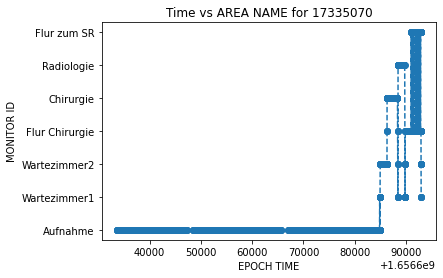

count is 1


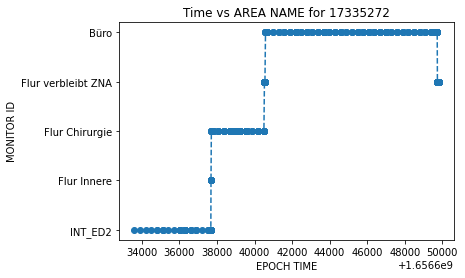

count is 2


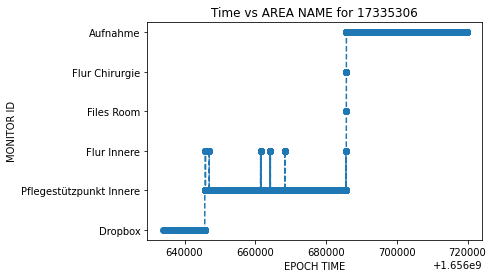

count is 3


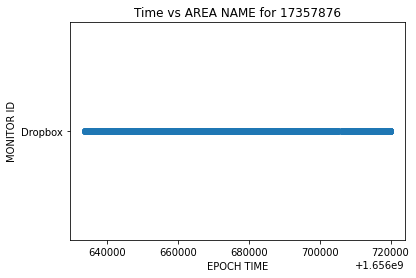

count is 4


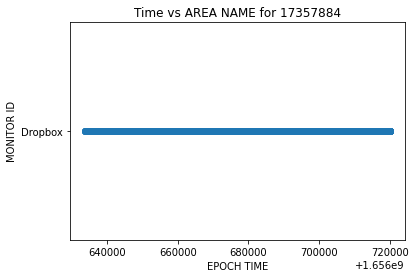

count is 5


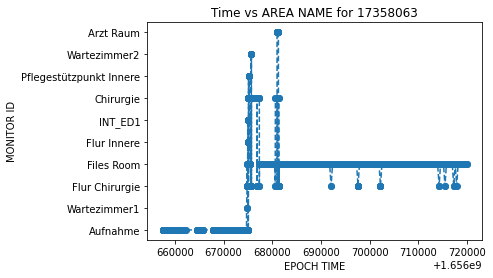

count is 6


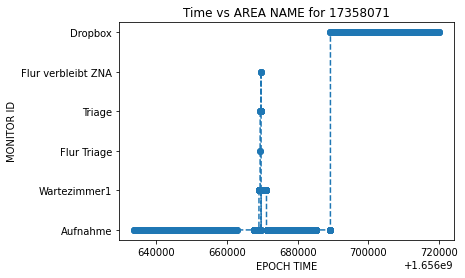

count is 7


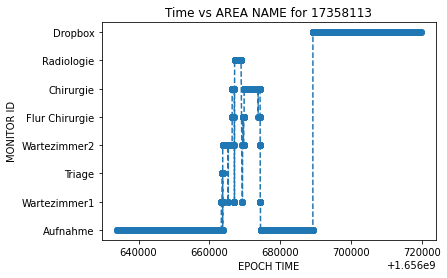

count is 8


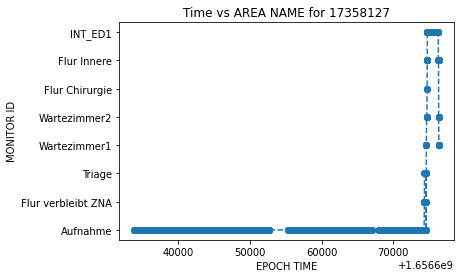

count is 9


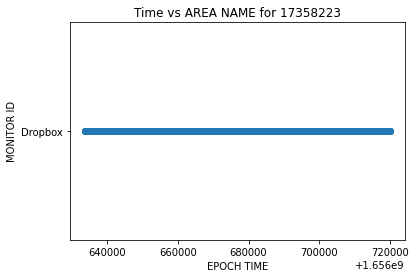

count is 10


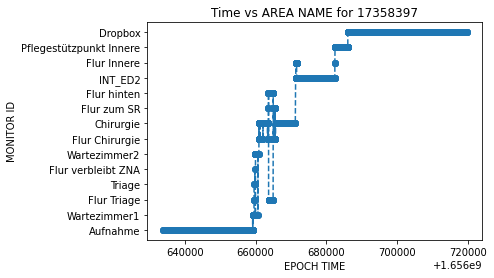

count is 11


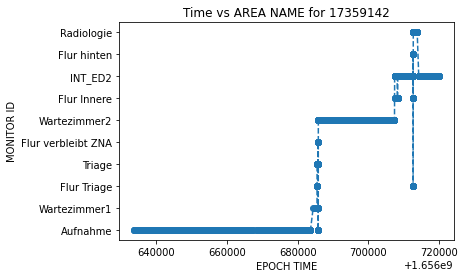

count is 12


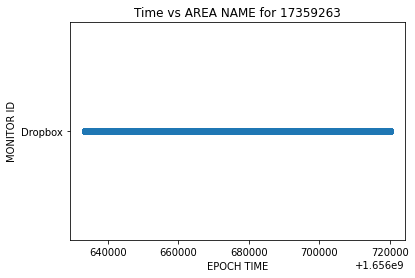

count is 13


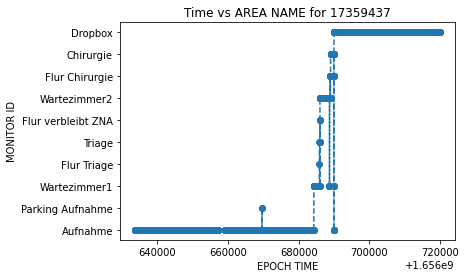

count is 14


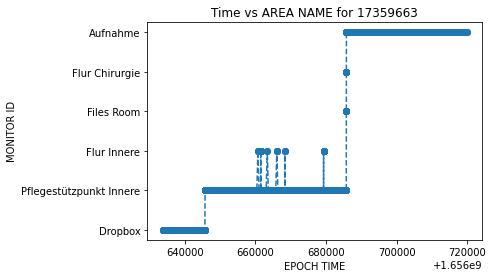

count is 15


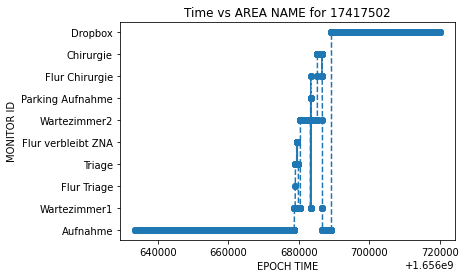

count is 16


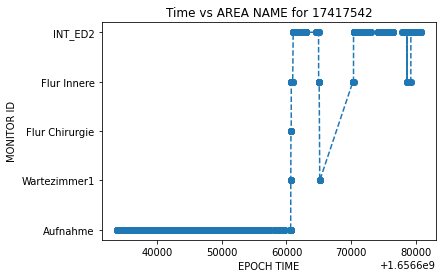

count is 17


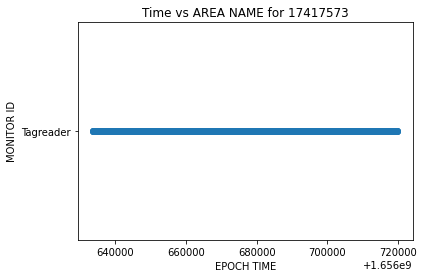

count is 18


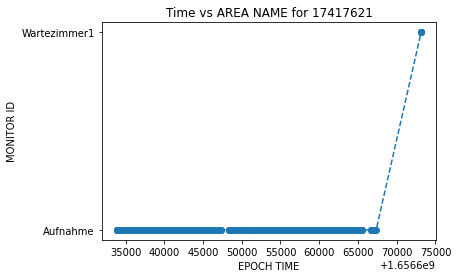

count is 19


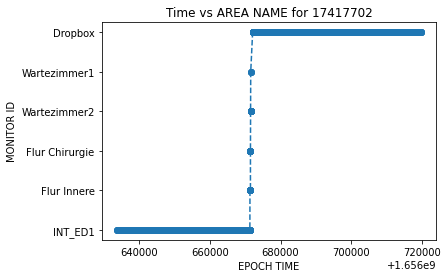

count is 20


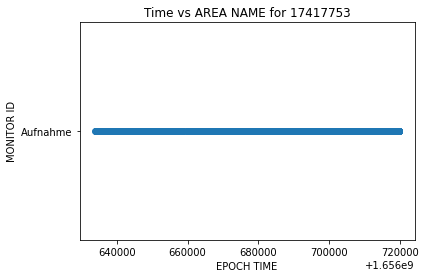

count is 21


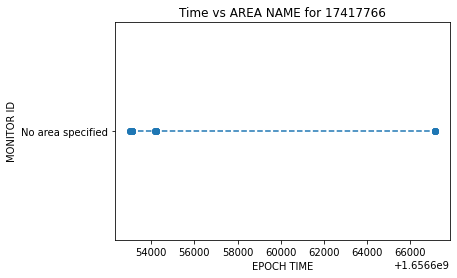

count is 22


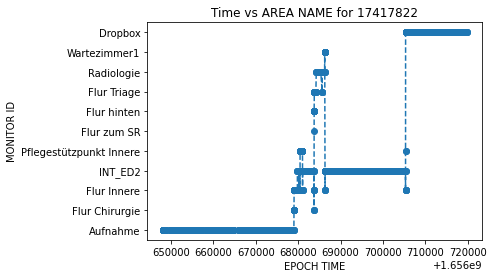

count is 23


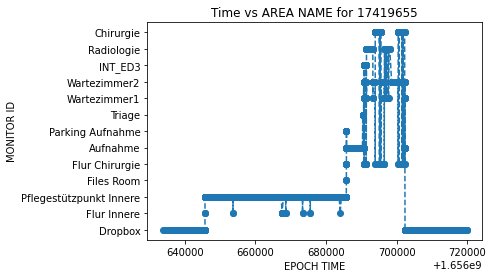

count is 24


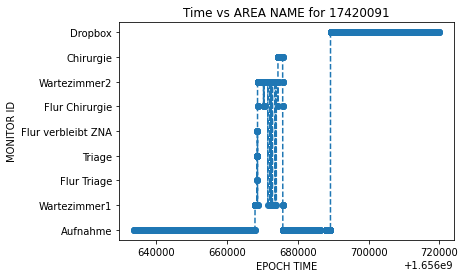

count is 25


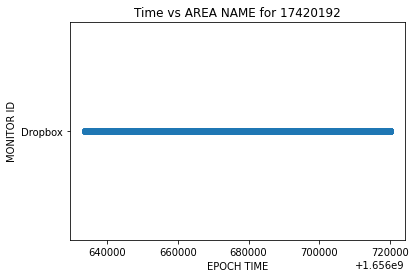

count is 26


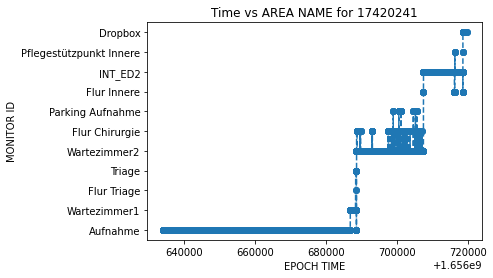

count is 27


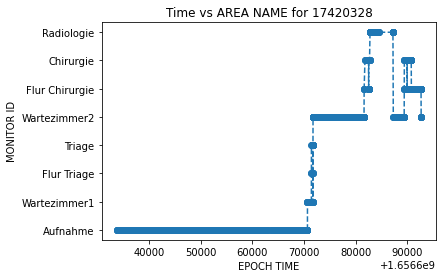

count is 28


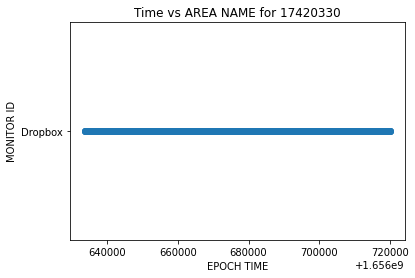

count is 29


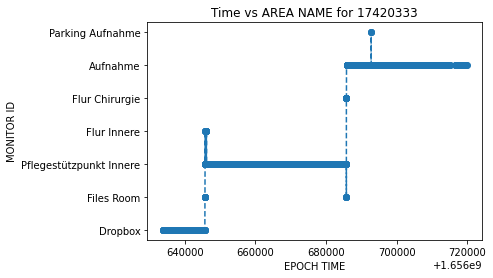

count is 30


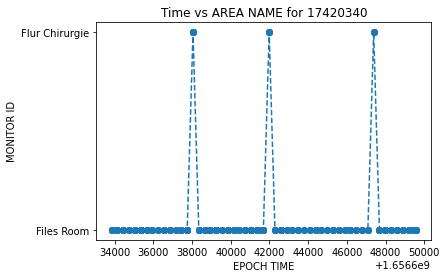

count is 31


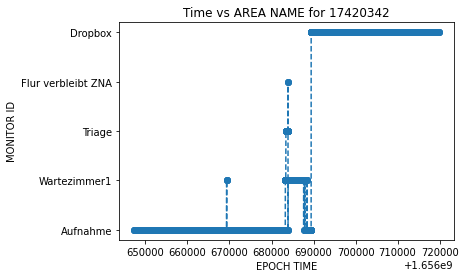

count is 32


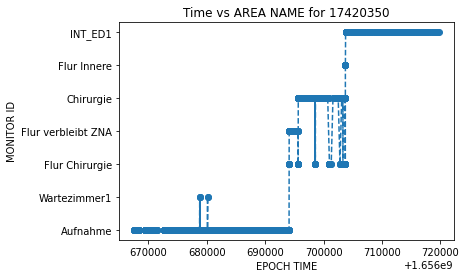

count is 33


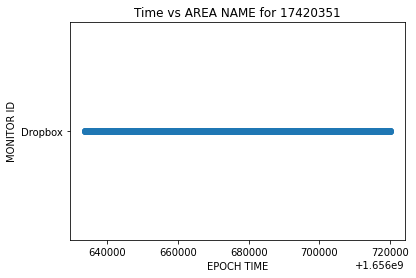

count is 34


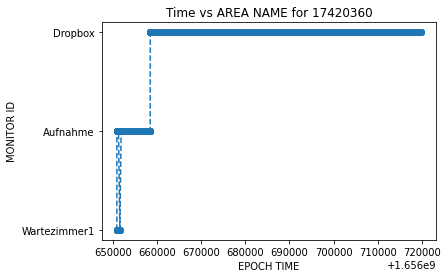

count is 35


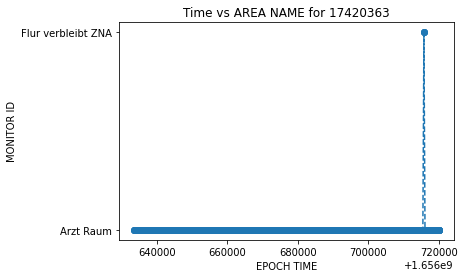

count is 36


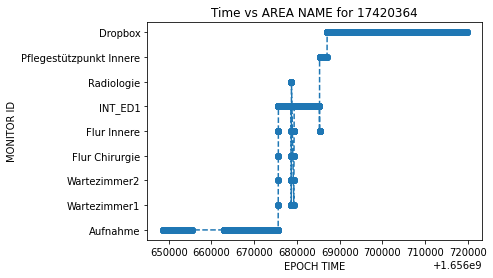

count is 37


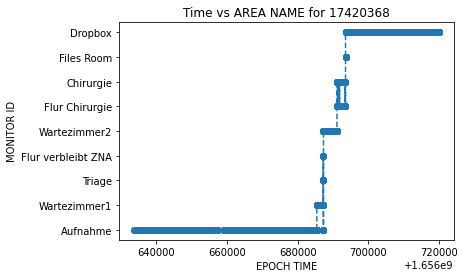

count is 38


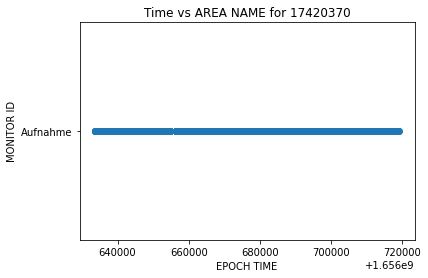

count is 39


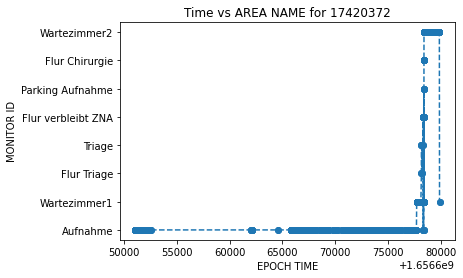

count is 40


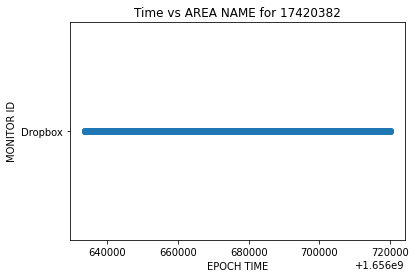

count is 41


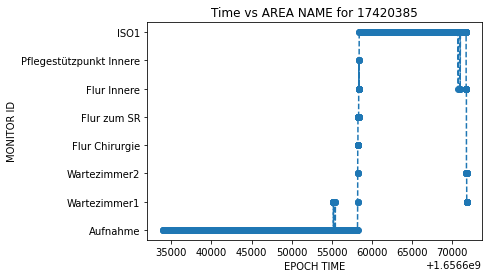

count is 42


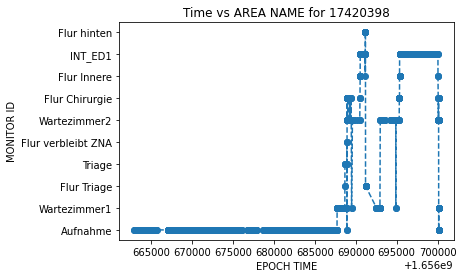

count is 43


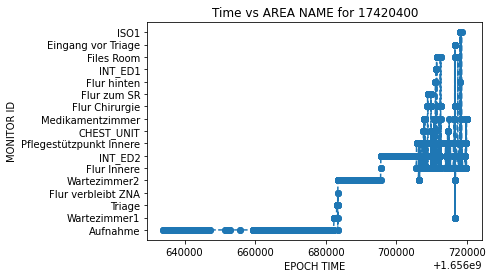

count is 44


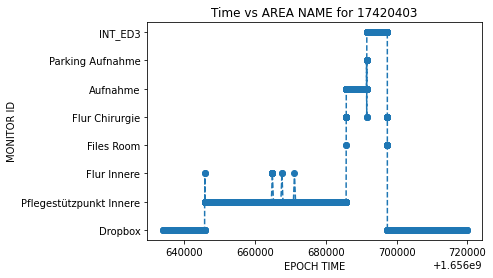

count is 45


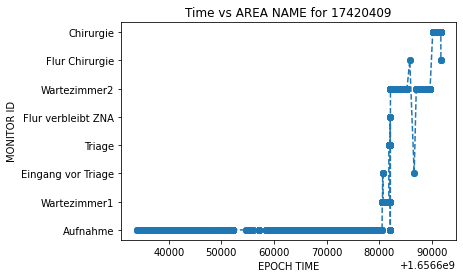

count is 46


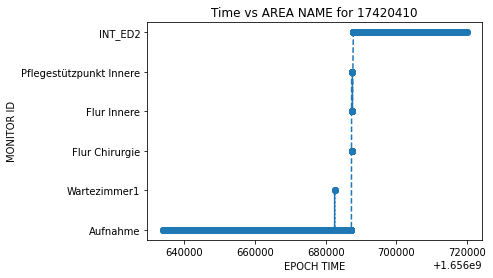

count is 47


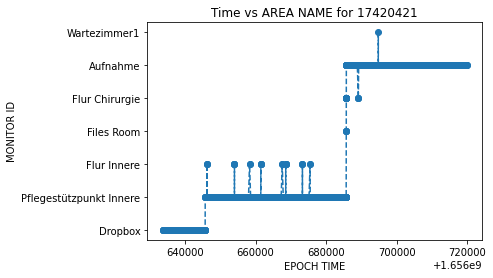

count is 48


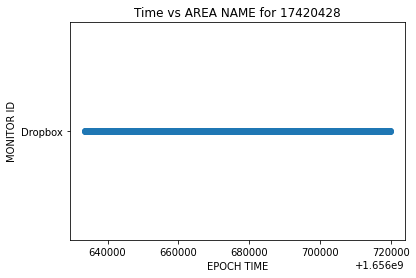

count is 49


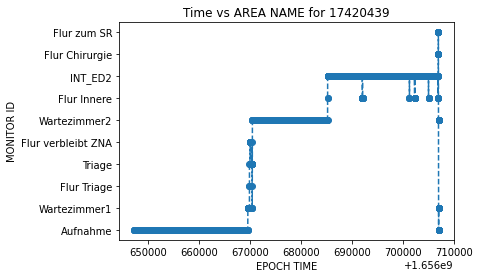

count is 50


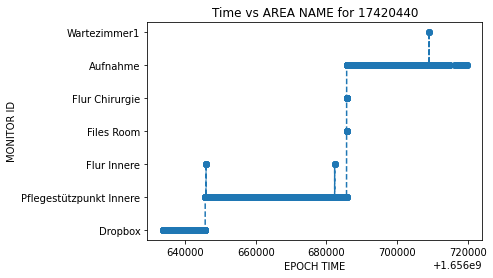

count is 51


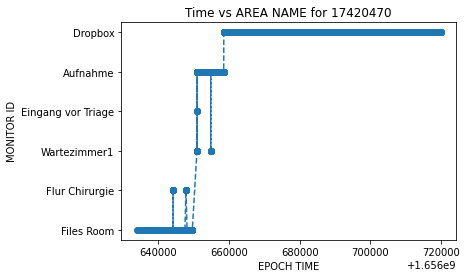

count is 52


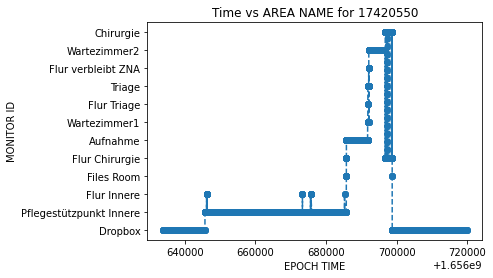

count is 53


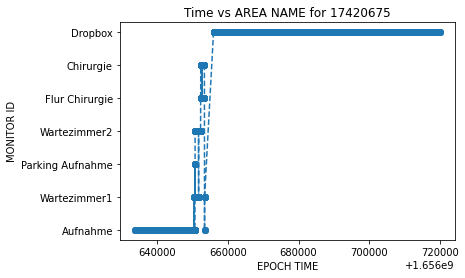

count is 54


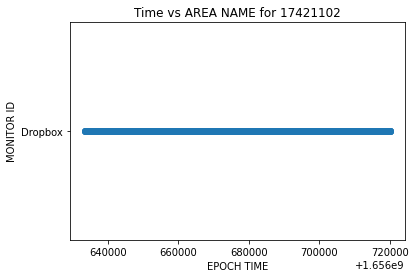

count is 55


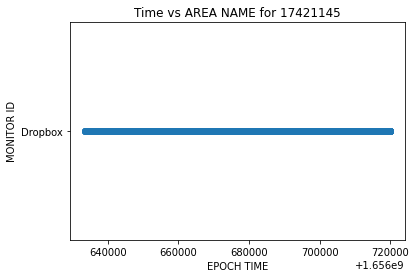

count is 56


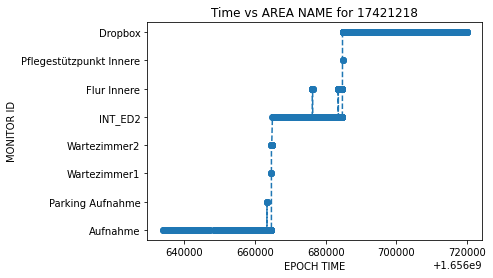

count is 57


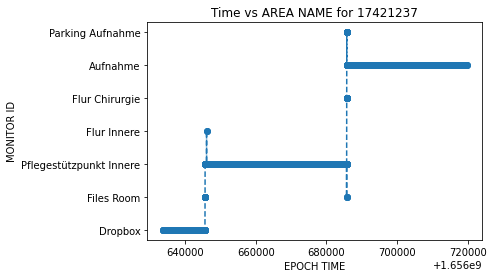

count is 58


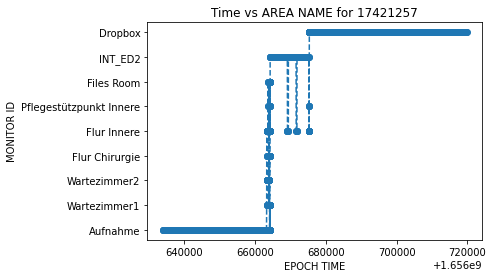

count is 59


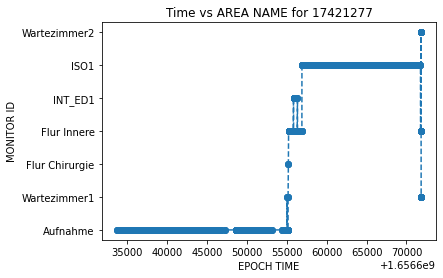

count is 60


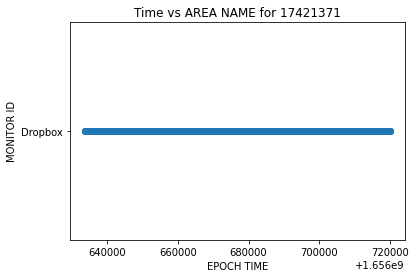

count is 61


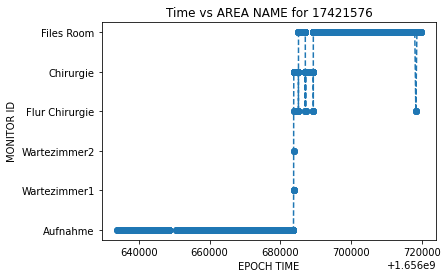

count is 62


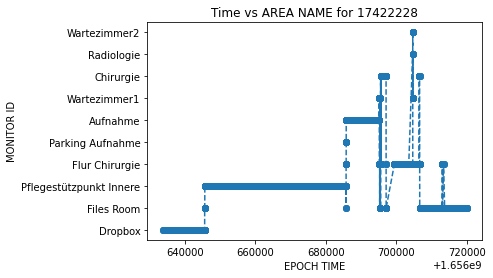

count is 63


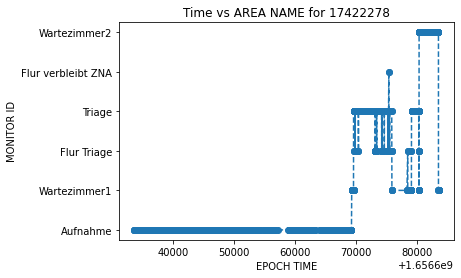

count is 64


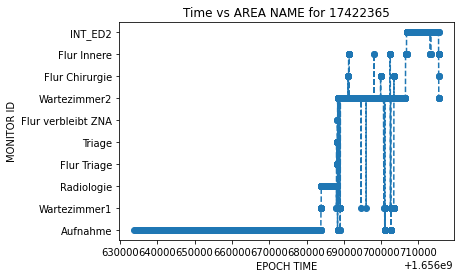

count is 65


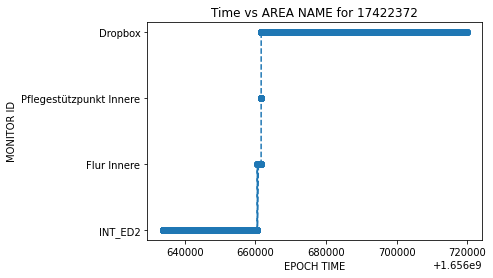

count is 66


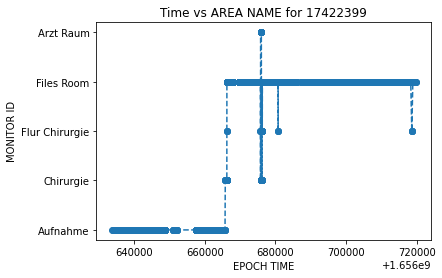

count is 67


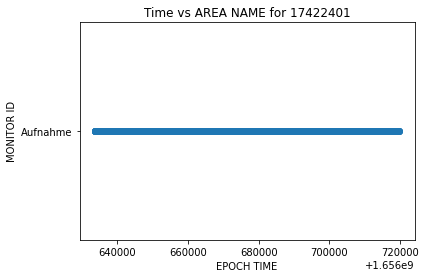

count is 68


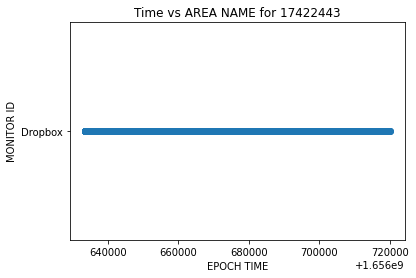

count is 69


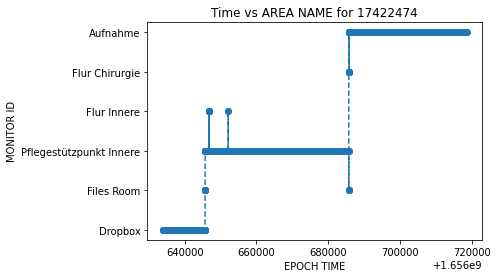

count is 70


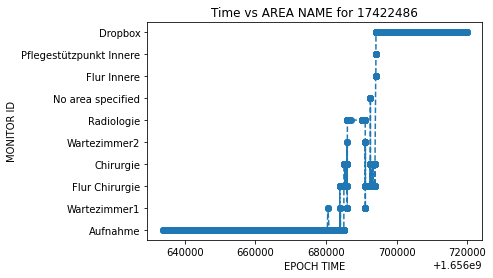

count is 71


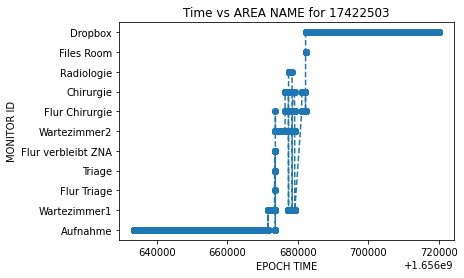

count is 72


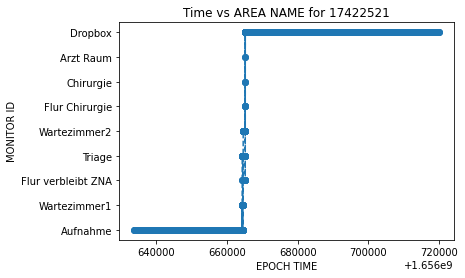

count is 73


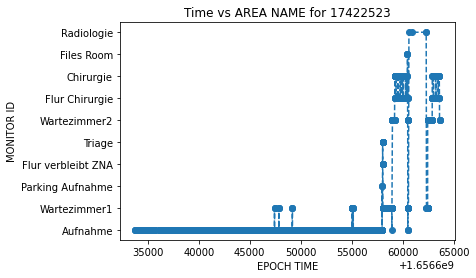

count is 74


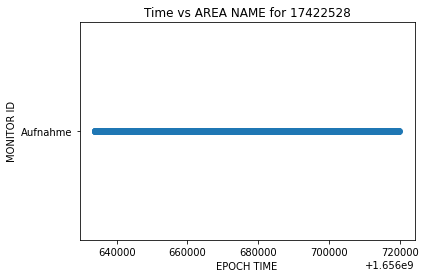

count is 75


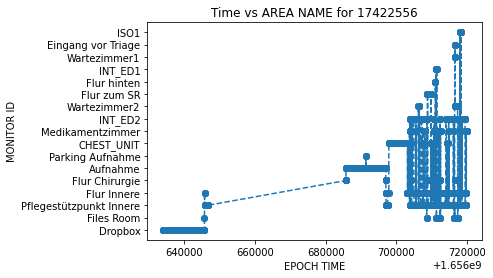

count is 76


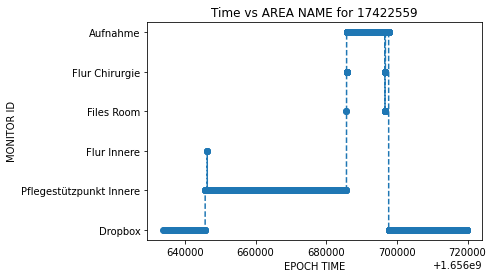

count is 77


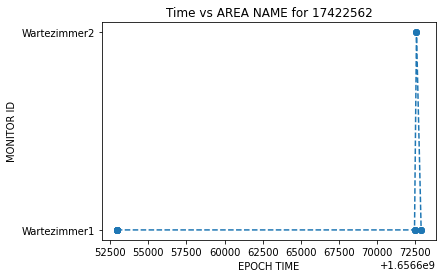

count is 78


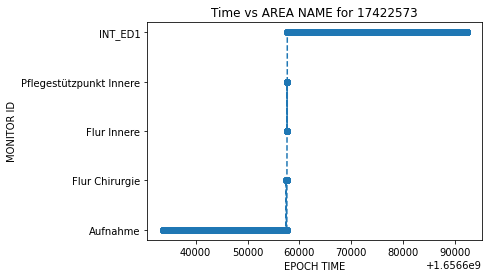

count is 79


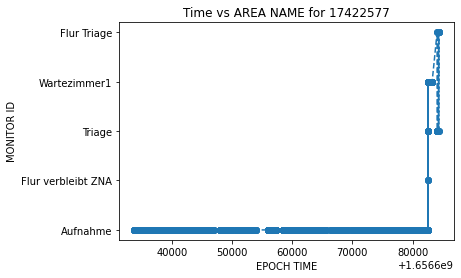

count is 80


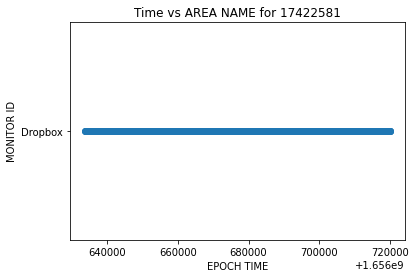

count is 81


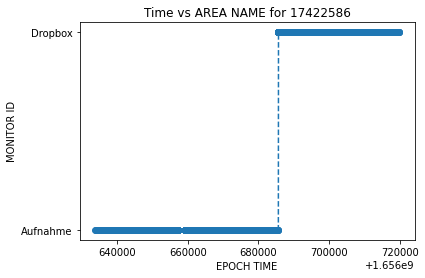

count is 82


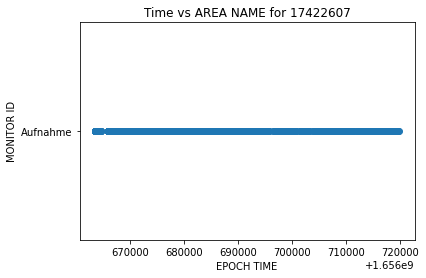

count is 83


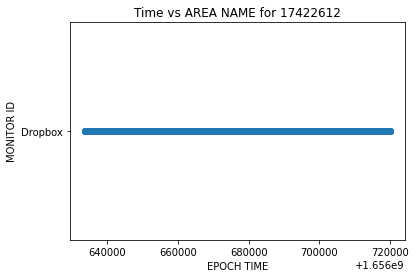

count is 84


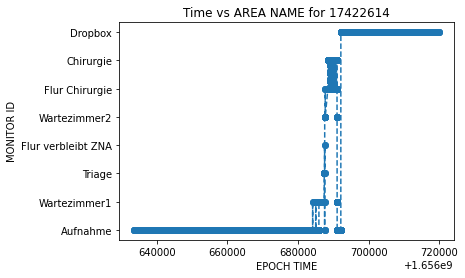

count is 85


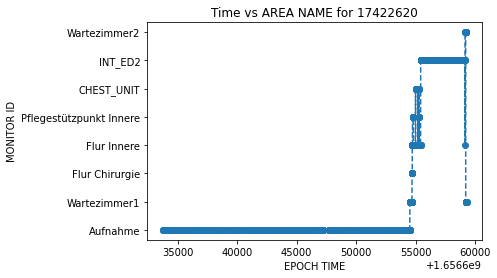

count is 86


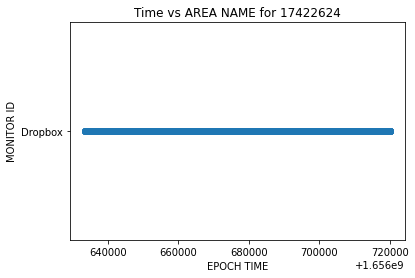

count is 87


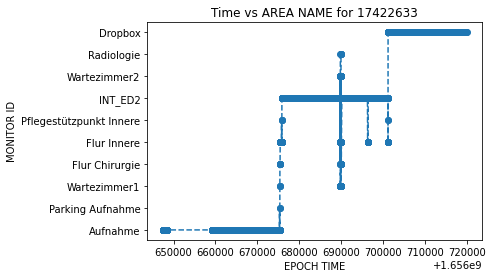

count is 88


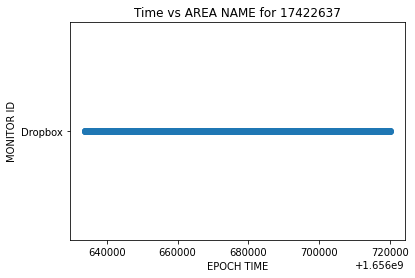

count is 89


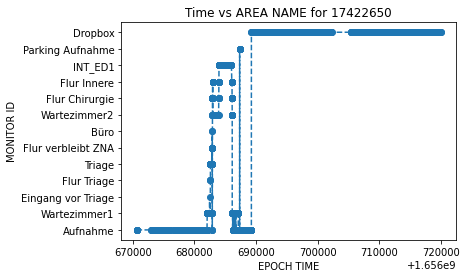

count is 90


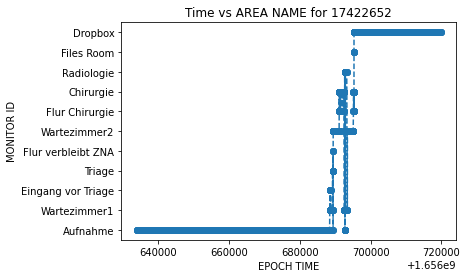

count is 91


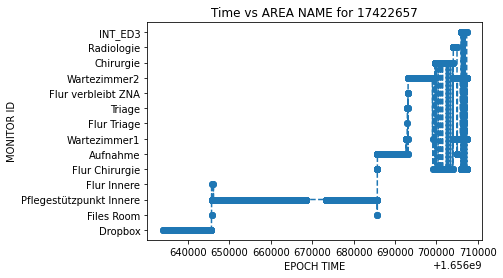

count is 92


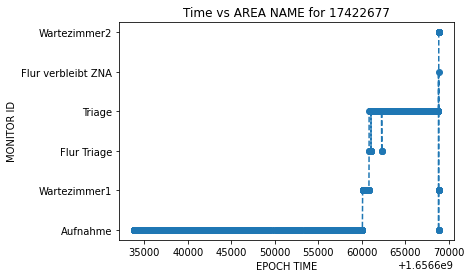

count is 93


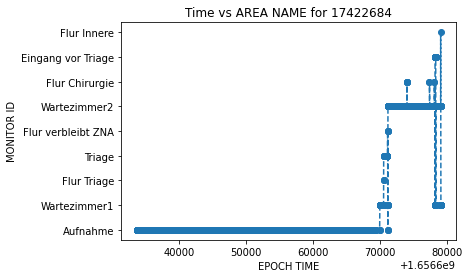

count is 94


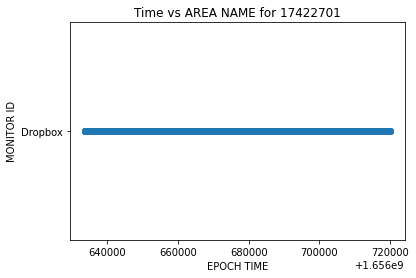

count is 95


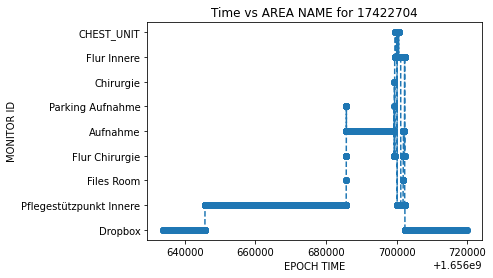

count is 96


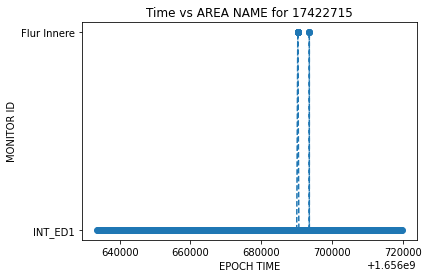

count is 97


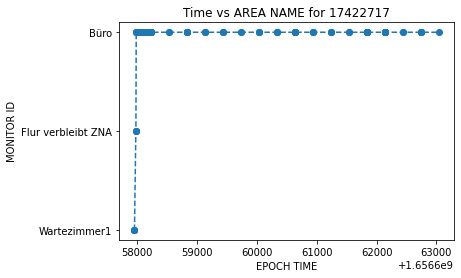

count is 98


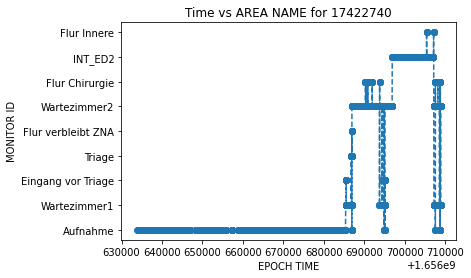

count is 99


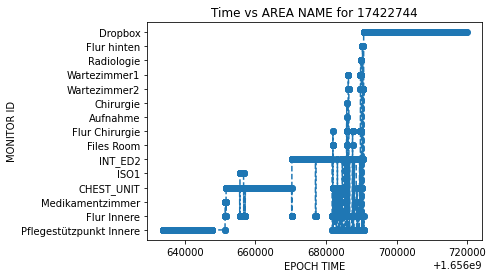

count is 100


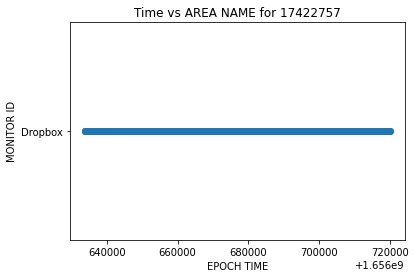

count is 101


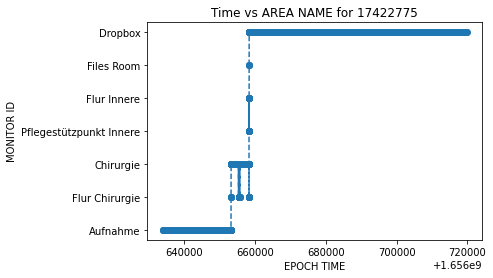

count is 102


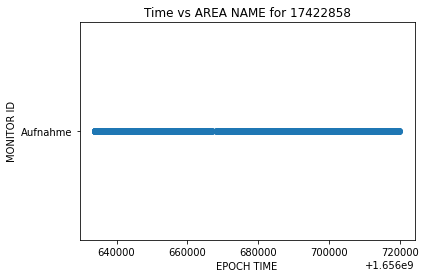

count is 103


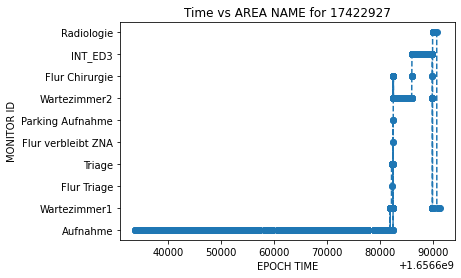

count is 104


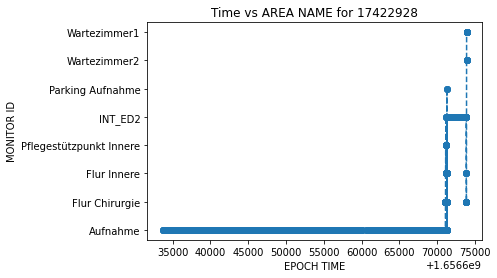

count is 105


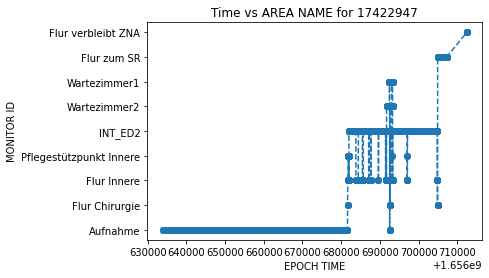

count is 106


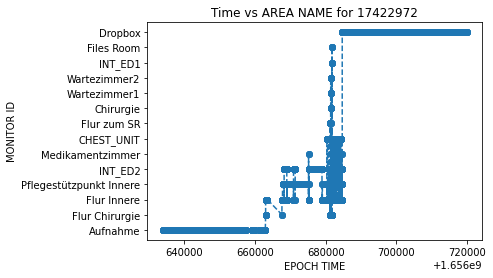

count is 107


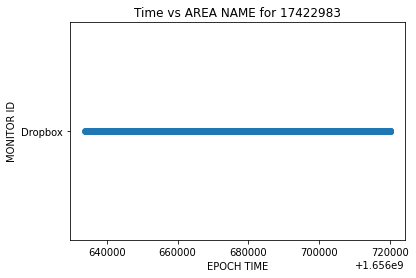

count is 108


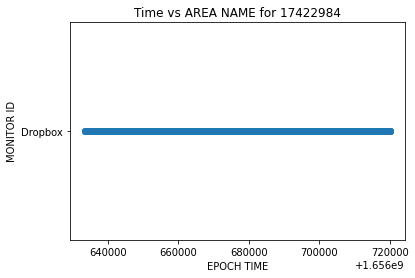

count is 109


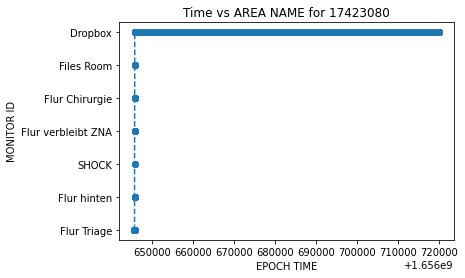

count is 110


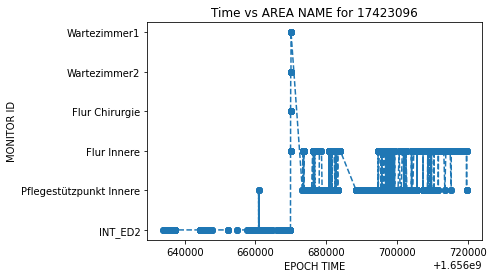

count is 111


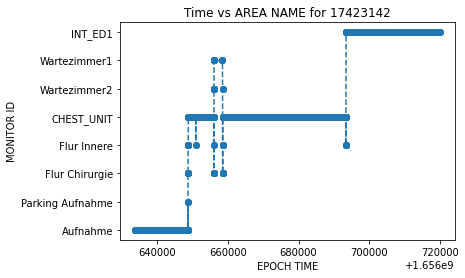

count is 112


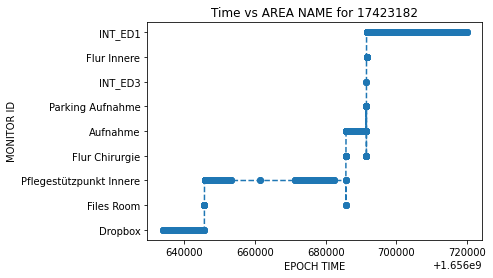

count is 113


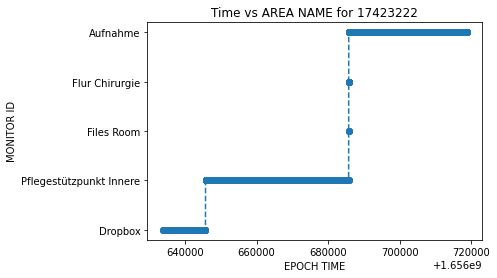

count is 114


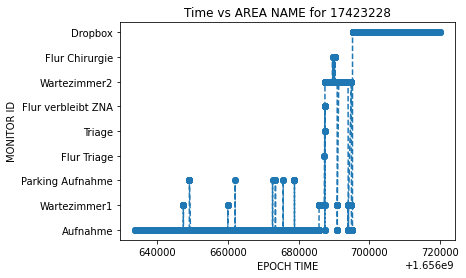

count is 115


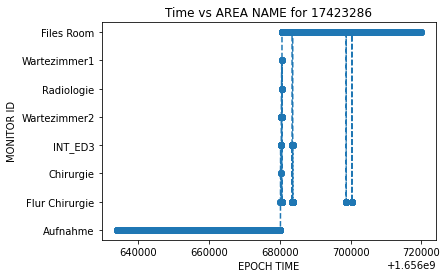

count is 116


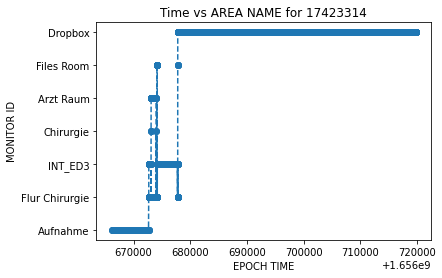

count is 117


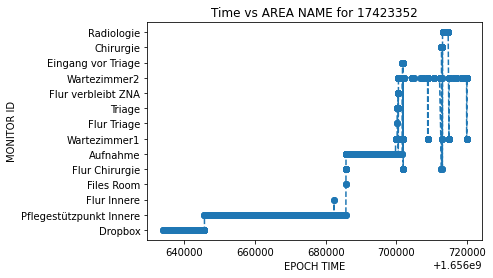

count is 118


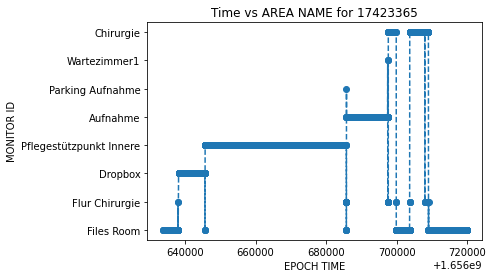

count is 119


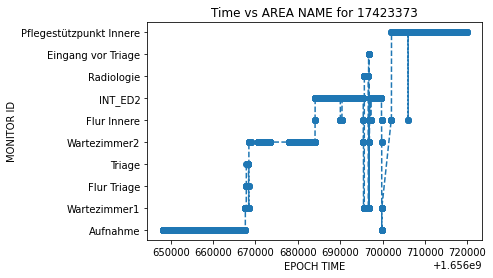

count is 120


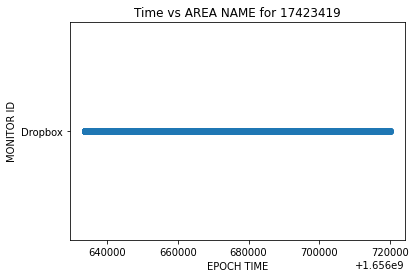

count is 121


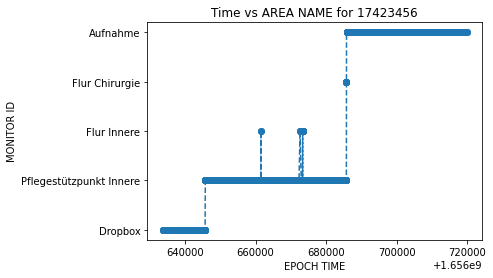

count is 122


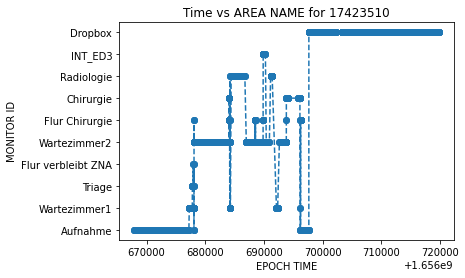

count is 123


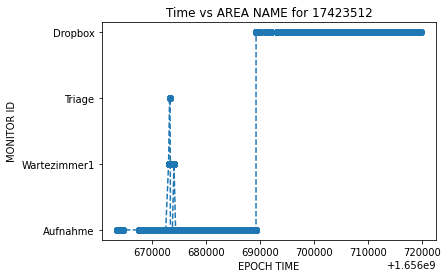

count is 124


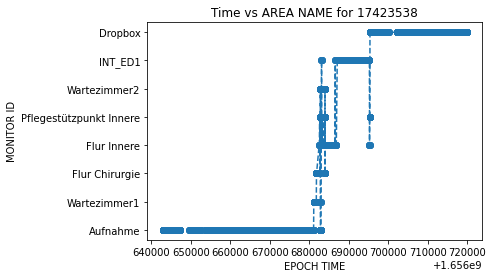

count is 125


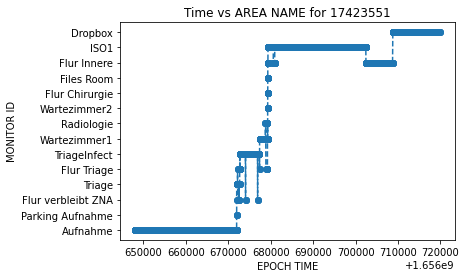

count is 126


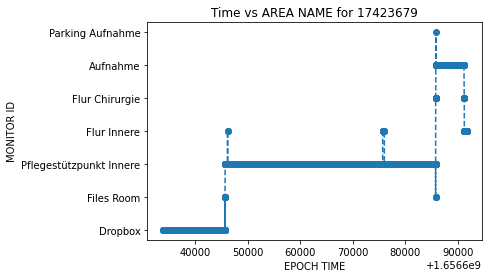

count is 127


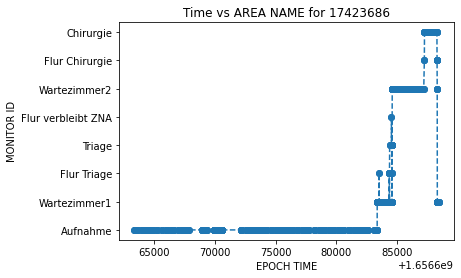

count is 128


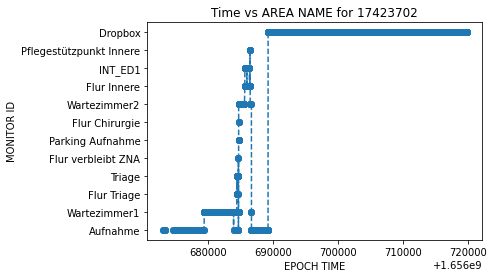

count is 129


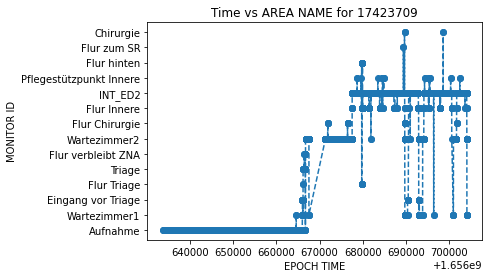

count is 130


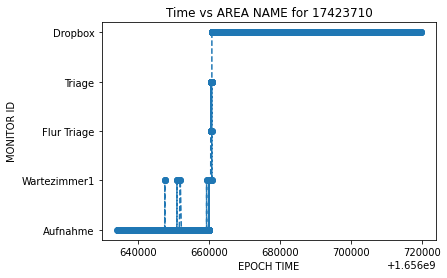

count is 131


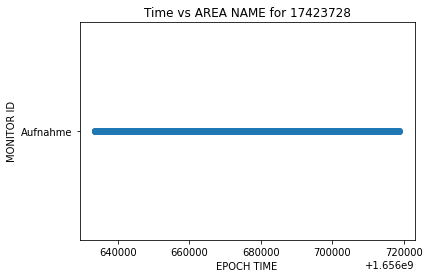

count is 132


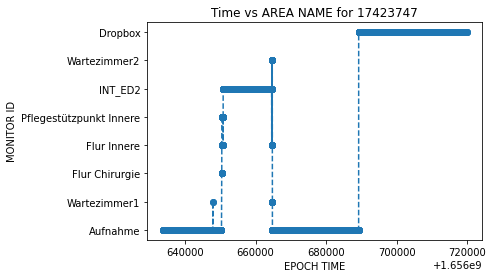

count is 133


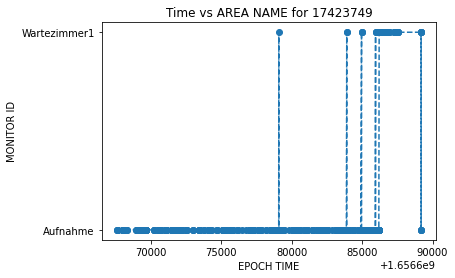

count is 134


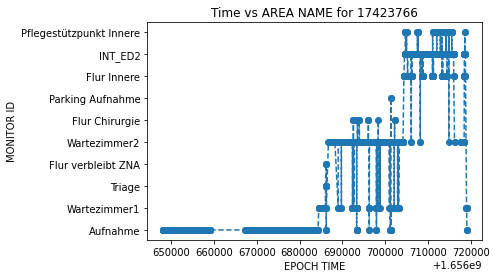

count is 135


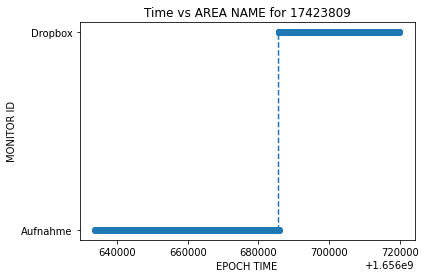

count is 136


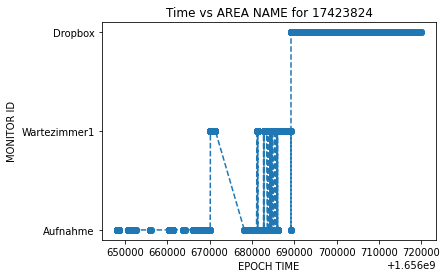

count is 137


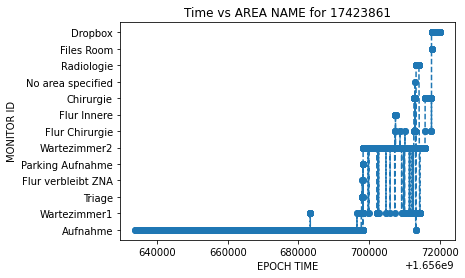

count is 138


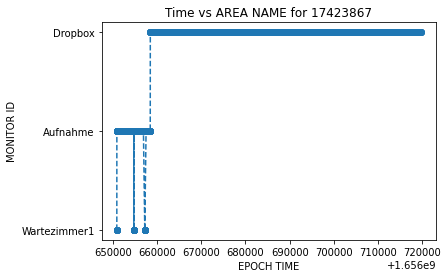

count is 139


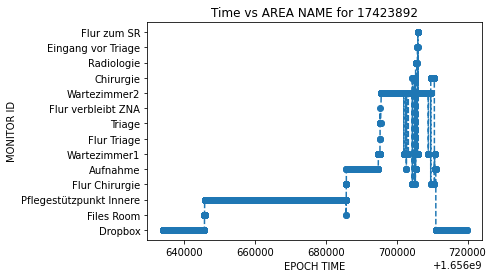

count is 140


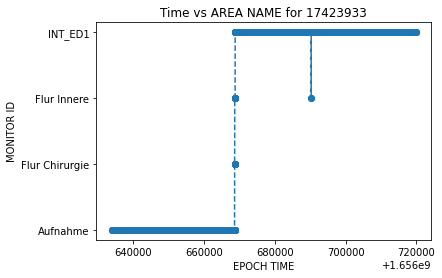

count is 141


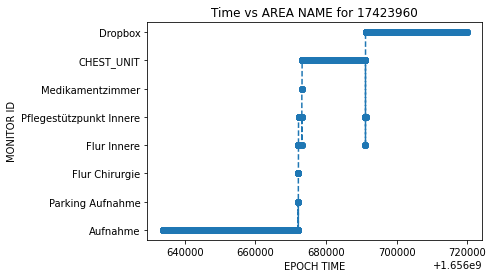

count is 142


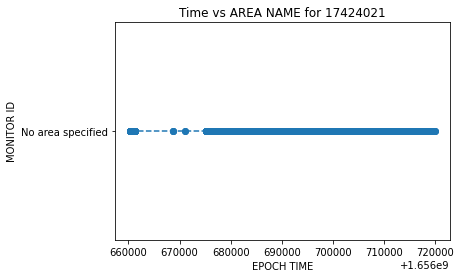

count is 143


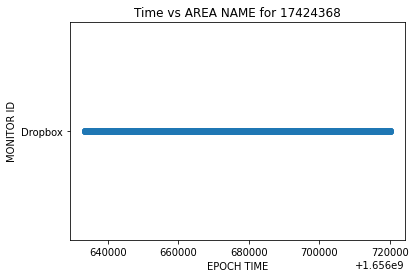

count is 144


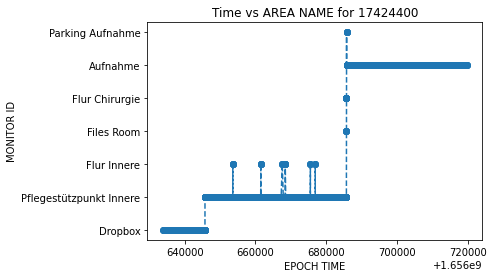

count is 145


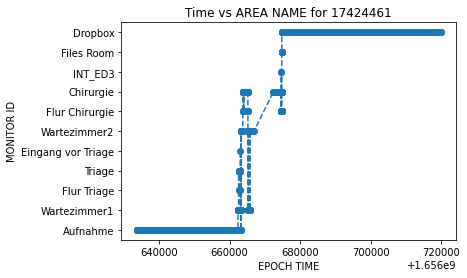

count is 146


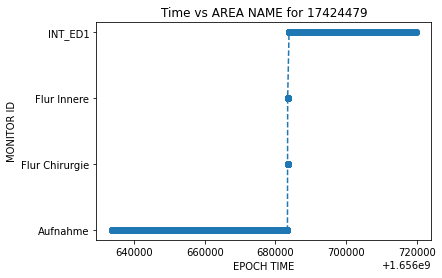

count is 147


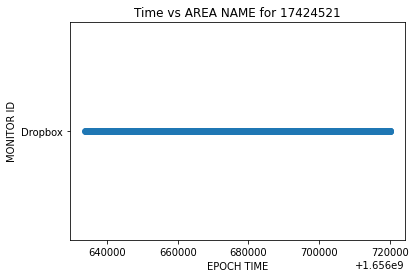

count is 148


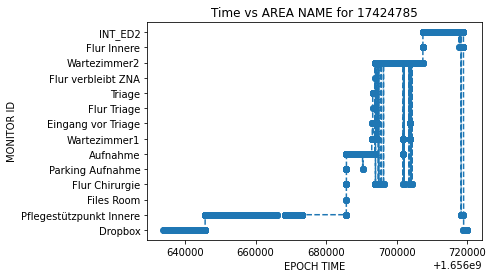

In [18]:
empty_tags = []
count = 0
for tag in df['TAG_ID'].unique():
    df_tag = df.loc[(df['TAG_ID']==tag) & (df['MONITOR_ID']!=0) & (df['TAG_TYPE']==19)]
    if df_tag.empty:
        empty_tags.append(tag)
    else:
        print(f"count is {count}")
        displayHistory(df_tag)
        count +=1

In [10]:
class Tag():
    #assuming the entire dataframe is passed and we extract the properties
    
    def __init__(self, df, tag):
        self.tagId = df.iloc[0]['TAG_ID']
        self.tagType = df.iloc[0]['TAG_TYPE']
        self.data = df.loc[df['TAG_ID'] == tag]
    
    #history based on timeframe specified
    def getHistory(self, startTime, endTime):
        return self.data.loc[(self.data['LOCAL_TIME'] > startTime) & (self.data['LOCAL_TIME'] < endTime)]
    
    def compress(self):
        """
        Removes subsequent reports of identical locations; 
        Calculates TIME_IN_ZONE calculated as timestamp first report - timestap last report
        
        Parameters: 
        df (pandas dataframe)
        
        Output:
        temp (pandas dataframe): compressed dataframe
                       
        """
        temp = self.data.copy()
        if not self.data.empty:
            temp = temp.sort_values(by=['TAG_ID', 'EPOCHTIME'])  
            temp = temp[temp.MONITOR_ID != 0]
            #keep monitor id if it is not equal to the previous or next one and keep tag id if it is equal to previous or next one
            temp['keep'] = temp['keep'] = (((temp.TAG_ID == temp.TAG_ID.shift(1))|(temp.TAG_ID == temp.TAG_ID.shift(-1))) & ((temp.MONITOR_ID != temp["MONITOR_ID"].shift(1)) | (temp.MONITOR_ID != temp["MONITOR_ID"].shift(-1))))
            temp['keep'].iloc[0] = True
            temp = temp[temp.keep == True]
            temp['TIME_LAST_REPORT_IN_ZONE'] = np.where((temp.MONITOR_ID == temp.MONITOR_ID.shift(-1)) & (temp.TAG_ID == temp.TAG_ID.shift(-1)) ,temp.EPOCHTIME.shift(-1),temp.EPOCHTIME)
            temp['LOCAL_TIME_LAST_REPORT_IN_ZONE'] = np.where((temp.MONITOR_ID == temp.MONITOR_ID.shift(-1)) & (temp.TAG_ID == temp.TAG_ID.shift(-1)) ,temp.LOCAL_TIME.shift(-1),temp.LOCAL_TIME)
            #remove duplicate monitor ids
            temp['remove'] = ((temp.TAG_ID == temp.TAG_ID.shift(1)) & (temp.MONITOR_ID == temp["MONITOR_ID"].shift(1)))
            temp = temp[temp.remove == False]
            #calculate time in zone
            temp['TIME_IN_ZONE'] = temp.TIME_LAST_REPORT_IN_ZONE - temp.EPOCHTIME
        else:
            temp['TIME_IN_ZONE'] = np.nan
            temp['TIME_LAST_REPORT_IN_ZONE'] = np.nan
            temp['LOCAL_TIME_LAST_REPORT_IN_ZONE'] = np.nan
        return(temp)
    
    def getLocation(self):
        #connectedmonitor at a particular timeframe
        pass
    
    def getDropZoneLocation(self):
        #dropzonelocation at a particular timeframe
        pass
    def checkOverlap(self, row):
       
        assert len(row) == 1
        #converting to series
        r_series = row.squeeze()
        try:
            a = pd.Interval(r_series['LOCAL_TIME_a'], r_series['LOCAL_TIME_LAST_REPORT_IN_ZONE_a'])
            b = pd.Interval(r_series['LOCAL_TIME_b'], r_series['LOCAL_TIME_LAST_REPORT_IN_ZONE_b'])
            if a.overlaps(b):
                return row
            # emit two rows instead
            cols = ['LOCAL_TIME_a', 'LOCAL_TIME_LAST_REPORT_IN_ZONE_a', 'MONITOR_ID', 'LOCAL_TIME_b', 'LOCAL_TIME_LAST_REPORT_IN_ZONE_b']
            sa, ea, ev, sb, eb = r_series[cols]
            return pd.DataFrame([
                [pd.NaT, pd.NaT, ev, sb, eb],
                [sa, ea, ev, pd.NaT, pd.NaT],
            ], columns=cols)
        except ValueError:
            return row
        
        
    def getIntersection(self, tag2):    
        df_A = compress(self.data.copy())
        df_B = compress(tag2.data.copy())
        print(df_A.columns)
        print(df_B.columns)
        
        for df in [df_A, df_B]:
            for k in ['LOCAL_TIME', 'LOCAL_TIME_LAST_REPORT_IN_ZONE']:
                df[k] = pd.to_datetime(df[k])
        # next, merge on eventname, regardless of interval overlapping
        zo = df_A.merge(df_B, on='MONITOR_ID', suffixes=['_a', '_b'], how='outer')
        out = zo.groupby(level=0).apply(self.checkOverlap).reset_index(drop=True)        
        return out
    
    def displayHistory(self):
        fig, ax = plt.subplots()
        ax.plot(self.data['EPOCHTIME'],self.data['AREA_NAME'],marker='o',linestyle="--",)
        ax.set_xlabel('EPOCH TIME')
        ax.set_ylabel('MONITOR ID')
        ax.set_title(f"Time vs AREA NAME for {self.data.iloc[0]['TAG_ID']}")
        fig.set_size_inches(16.5, 8.5)
        plt.show()
        


In [11]:
tag_17359437 = Tag(df, 17359437)
tag_17417502 = Tag(df, 17417502)

In [12]:
# tag_17359437.getHistory('2022-07-01 00:00:52', '2022-07-01 00:10:00')
tag_17359437.data
# tag_17420403.getHistory('2022-07-01 00:00:52', '2022-07-01 00:10:00').head()

,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,LOCAL_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME
424,1656633697,17359437,512765,0,0,0,0,0,0,19,-103.0,2,1,8,175,8,24,8,16,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,390531898.0,2022-07-01 00:01:37,Aufnahme,REG,Aufnahme
425,1656633697,17359437,512765,0,0,0,0,0,0,19,-86.0,1,1,8,175,8,24,8,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,390531898.0,2022-07-01 00:01:37,Aufnahme,REG,Aufnahme
426,1656633697,17359437,512765,0,0,0,0,0,0,19,-84.0,2,1,8,175,8,24,8,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,390531898.0,2022-07-01 00:01:37,Aufnahme,REG,Aufnahme
427,1656633697,17359437,512765,0,0,0,0,0,0,19,-96.0,1,1,8,175,8,24,8,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,390531898.0,2022-07-01 00:01:37,Aufnahme,REG,Aufnahme
428,1656633697,17359437,512765,0,0,0,0,0,0,19,-95.0,2,1,8,175,8,24,8,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,390531898.0,2022-07-01 00:01:37,Aufnahme,REG,Aufnahme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510970,1656719624,17359437,358542,0,0,0,0,0,0,19,-72.0,1,1,10,188,17,24,8,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2036,358542.0,390531898.0,2022-07-01 23:53:44,Dropbox Registrierung,Dropbox,Dropbox
510972,1656719625,17359437,358542,0,0,0,0,0,0,19,-88.0,1,1,10,188,8,24,8,17,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2036,358542.0,390531898.0,2022-07-01 23:53:45,Dropbox Registrierung,Dropbox,Dropbox
512393,1656719924,17359437,358542,0,0,0,0,0,0,19,-87.0,1,1,11,188,17,24,8,16,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2036,358542.0,390531898.0,2022-07-01 23:58:44,Dropbox Registrierung,Dropbox,Dropbox
512395,1656719924,17359437,358542,0,0,0,0,0,0,19,-71.0,1,1,11,188,17,24,8,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2036,358542.0,390531898.0,2022-07-01 23:58:44,Dropbox Registrierung,Dropbox,Dropbox


In [ ]:
# # def getIntersection(tag1, tag2):
# #     #get the intersection between the tag time and location with another tag object for a specific timeframe
# #     #define the timeframe block (10 seconds?)
# #     #check locations of tag1 and tag2 in that timeframe
# #     #if there are common locations get the dfs
# #     #compare timeframes and if yes, say yes in contact
    
# startTime = '2022-07-01 00:00:52'
# endTime =  '2022-07-01 00:15:00'
# tag1_data = tag_17422556.getHistory(startTime, endTime)
# tag2_data = tag_17423182.getHistory(startTime, endTime)

# timeframe = 10 seconds
# check if anything exists in df 1 in that time frame
# check if anything exists in df 2 in that time frame

# if not list(set(tag1_data.MONITOR_ID) & set(tag2_data.MONITOR_ID)):
    

In [28]:
def compress(df):
    """
    Function:           Removing subsequent reports of identical locatons;  
                        Calculating TIME_IN_ZONE calculated as timestamp first report - timestap last report
    
    Input requirements: MONITOR_ID
                        
                        
    """
    
    
    temp = df
    if not df.empty:
        temp = temp.sort_values(by=['TAG_ID', 'EPOCHTIME'])  
        temp = temp[temp.MONITOR_ID != 0]
        temp['keep'] = temp['keep'] = (((temp.TAG_ID == temp.TAG_ID.shift(1))|(temp.TAG_ID == temp.TAG_ID.shift(-1))) & ((temp.MONITOR_ID != temp["MONITOR_ID"].shift(1)) | (temp.MONITOR_ID != temp["MONITOR_ID"].shift(-1))))
        temp['keep'].iloc[0] = True
        temp = temp[temp.keep == True]
        temp['TIME_LAST_REPORT_IN_ZONE'] = np.where((temp.MONITOR_ID == temp.MONITOR_ID.shift(-1)) & (temp.TAG_ID == temp.TAG_ID.shift(-1)) ,temp.EPOCHTIME.shift(-1),temp.EPOCHTIME)
        temp['LOCAL_TIME_LAST_REPORT_IN_ZONE'] = np.where((temp.MONITOR_ID == temp.MONITOR_ID.shift(-1)) & (temp.TAG_ID == temp.TAG_ID.shift(-1)) ,temp.LOCAL_TIME.shift(-1),temp.LOCAL_TIME)
        temp['remove'] = ((temp.TAG_ID == temp.TAG_ID.shift(1)) & (temp.MONITOR_ID == temp["MONITOR_ID"].shift(1)))
        temp = temp[temp.remove == False]
        temp['TIME_IN_ZONE'] = temp.TIME_LAST_REPORT_IN_ZONE - temp.EPOCHTIME
    else:
        temp['TIME_IN_ZONE'] = np.nan
        temp['TIME_LAST_REPORT_IN_ZONE'] = np.nan
        temp['LOCAL_TIME_LAST_REPORT_IN_ZONE'] = np.nan
    return(temp)

In [97]:
df.loc[(df['LOCAL_TIME'] > '2022-07-01 15:00:00') & (df['LOCAL_TIME'] < '2022-07-01 16:00:00')]


,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,LOCAL_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME
318079,1656687665,1983994,536759,0,0,0,0,1,0,15,-94.0,1,0,11,171,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 15:01:05,OC107F,INT_ED,INT_ED2
318083,1656687666,1983994,536759,0,0,0,0,1,0,15,-81.0,1,0,11,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 15:01:06,OC107F,INT_ED,INT_ED2
318335,1656687694,1983994,0,0,0,0,0,1,0,15,-92.0,1,0,12,0,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,2735.0,2022-07-01 15:01:34,0,0,No area specified
318337,1656687694,1983994,0,0,0,0,0,1,0,15,-82.0,1,0,12,0,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,2735.0,2022-07-01 15:01:34,0,0,No area specified
318505,1656687719,1983994,0,0,0,0,0,0,0,15,-93.0,2,0,13,0,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,2735.0,2022-07-01 15:01:59,0,0,No area specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343397,1656691158,17424785,512765,0,0,0,0,1,0,19,-85.0,3,0,1,175,8,24,8,16,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,397758037.0,2022-07-01 15:59:18,Aufnahme,REG,Aufnahme
343400,1656691158,17424785,512765,0,0,0,0,1,0,19,-83.0,3,0,1,175,8,24,8,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,397758037.0,2022-07-01 15:59:18,Aufnahme,REG,Aufnahme
343648,1656691188,17424785,512765,0,0,0,0,0,0,19,-86.0,1,1,2,175,7,24,8,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,397758037.0,2022-07-01 15:59:48,Aufnahme,REG,Aufnahme
343655,1656691188,17424785,512765,0,0,0,0,0,0,19,-91.0,1,1,2,175,7,24,8,16,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,397758037.0,2022-07-01 15:59:48,Aufnahme,REG,Aufnahme


In [98]:
tag1 = Tag(df, 1983994)
tag2 = Tag(df, 17424785)


tag_1_compressed = compress(tag1.data) 
tag_1_compressed = tag_1_compressed.rename(columns={'LOCAL_TIME': 'START_TIME', 'LOCAL_TIME_LAST_REPORT_IN_ZONE':'END_TIME'})
tag_1_compressed

C:\Users\320159994\AppData\Local\Temp\ipykernel_20168\7736883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['keep'].iloc[0] = True


,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,START_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME,keep,TIME_LAST_REPORT_IN_ZONE,END_TIME,remove,TIME_IN_ZONE
723,1656633761,1983994,513681,0,0,0,0,0,0,15,-82.0,1,1,9,28,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5214,536753.0,2735.0,2022-07-01 00:02:41,OC107A,INT_ED,INT_ED2,True,1.656634e+09,2022-07-01 00:02:41,False,0.0
2108,1656634061,1983994,536759,0,0,0,0,0,0,15,-83.0,1,1,10,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 00:07:41,OC107F,INT_ED,INT_ED2,True,1.656635e+09,2022-07-01 00:17:41,False,600.0
6678,1656634961,1983994,513776,0,0,0,0,0,0,15,-87.0,1,1,13,40,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2032,536753.0,2735.0,2022-07-01 00:22:41,OC107C,INT_ED,INT_ED2,True,1.656637e+09,2022-07-01 00:57:42,False,2101.0
17532,1656637283,1983994,513681,0,0,0,0,1,0,15,-83.0,1,0,5,28,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5214,536753.0,2735.0,2022-07-01 01:01:23,OC107A,INT_ED,INT_ED2,True,1.656637e+09,2022-07-01 01:01:23,False,0.0
17655,1656637311,1983994,513776,0,0,0,0,0,0,15,-83.0,1,0,7,40,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2032,536753.0,2735.0,2022-07-01 01:01:51,OC107C,INT_ED,INT_ED2,True,1.656637e+09,2022-07-01 01:01:51,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489821,1656715536,1983994,536759,0,0,0,0,0,0,15,-83.0,1,0,7,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 22:45:36,OC107F,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:33:11,False,2855.0
504202,1656718404,1983994,536747,0,0,0,0,0,0,15,-92.0,2,0,2,169,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2057,536753.0,2735.0,2022-07-01 23:33:24,OC107E,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:33:24,False,0.0
504279,1656718419,1983994,513776,0,0,0,0,0,0,15,-94.0,1,0,3,40,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2032,536753.0,2735.0,2022-07-01 23:33:39,OC107C,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:34:05,False,26.0
504473,1656718449,1983994,536759,0,0,0,0,0,0,15,-95.0,1,0,5,171,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 23:34:09,OC107F,INT_ED,INT_ED2,True,1.656719e+09,2022-07-01 23:35:46,False,97.0


In [99]:
tag_2_compressed = compress(tag2.data) 
tag_2_compressed = tag_2_compressed.rename(columns={'LOCAL_TIME': 'START_TIME', 'LOCAL_TIME_LAST_REPORT_IN_ZONE':'END_TIME'})
tag_2_compressed

C:\Users\320159994\AppData\Local\Temp\ipykernel_20168\7736883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['keep'].iloc[0] = True


,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,START_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME,keep,TIME_LAST_REPORT_IN_ZONE,END_TIME,remove,TIME_IN_ZONE
211,1656633654,17424785,358552,0,0,0,0,0,0,19,-65.0,1,1,8,190,19,24,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2020,358552.0,397758037.0,2022-07-01 00:00:54,Dropbox Pflegestützpunkt Innere,Dropbox,Dropbox,True,1.656646e+09,2022-07-01 03:21:51,False,12057.0
58172,1656645726,17424785,516077,0,0,0,0,1,0,19,-75.0,1,0,1,145,19,24,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5197,516077.0,397758037.0,2022-07-01 03:22:06,Pflegestützpunkt Innere,CEN_STAT,Pflegestützpunkt Innere,True,1.656686e+09,2022-07-01 14:28:47,False,40001.0
303273,1656685729,17424785,514236,0,0,0,0,1,0,19,-93.0,1,0,12,99,19,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5195,514236.0,397758037.0,2022-07-01 14:28:49,Files Room,FILES_ROOM,Files Room,True,1.656686e+09,2022-07-01 14:28:50,False,1.0
303369,1656685732,17424785,512693,0,0,0,0,0,0,19,-89.0,1,0,13,6,19,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2033,513929.0,397758037.0,2022-07-01 14:28:52,Flur Chirurgie 1,CORR,Flur Chirurgie,True,1.656686e+09,2022-07-01 14:28:53,False,1.0
303567,1656685738,17424785,513929,0,0,0,0,0,0,19,-93.0,1,0,14,57,17,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5157,513929.0,397758037.0,2022-07-01 14:28:58,Flur Chirurgie 2,CORR,Flur Chirurgie,True,1.656686e+09,2022-07-01 14:29:01,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505960,1656718695,17424785,513721,0,0,0,0,1,0,19,-71.0,1,0,12,32,19,24,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2023,536753.0,397758037.0,2022-07-01 23:38:15,OC107B,INT_ED,INT_ED2,True,1.656719e+09,2022-07-01 23:41:24,False,189.0
507230,1656718917,17424785,536759,0,0,0,0,1,0,19,-78.0,1,0,2,171,19,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,397758037.0,2022-07-01 23:41:57,OC107F,INT_ED,INT_ED2,True,1.656719e+09,2022-07-01 23:41:57,False,0.0
507256,1656718920,17424785,513936,0,0,0,0,1,0,19,-66.0,1,0,3,59,19,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2047,513632.0,397758037.0,2022-07-01 23:42:00,Flur Innere 2,CORR,Flur Innere,True,1.656719e+09,2022-07-01 23:42:02,False,2.0
507333,1656718926,17424785,516077,0,0,0,1,1,0,19,-77.0,1,0,4,145,10,24,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5197,516077.0,397758037.0,2022-07-01 23:42:06,Pflegestützpunkt Innere,CEN_STAT,Pflegestützpunkt Innere,True,1.656719e+09,2022-07-01 23:42:07,False,1.0


In [105]:
def get_info(x):
    #Fully included
    c0 = (x.START_TIME >= tag_2_compressed.START_TIME) & (x.END_TIME <= tag_2_compressed.END_TIME)
    #start lower, end include
    c1 = (x.START_TIME <= tag_2_compressed.START_TIME) & (x.END_TIME >= tag_2_compressed.START_TIME)
    #start include, end higher
    c2 = (x.START_TIME <= tag_2_compressed.END_TIME) & (x.END_TIME >= tag_2_compressed.END_TIME)

    #filter with conditions and sort by delta
    _tag_2_compressed = tag_2_compressed[c0|c1|c2].sort_values('TIME_IN_ZONE',ascending=True)

    return None if len(_tag_2_compressed) == 0 else _tag_2_compressed.iloc[0].TAG_ID 

tag_1_compressed['info'] = tag_1_compressed.apply(lambda x : get_info(x), axis='columns')


In [106]:
df1 = tag_1_compressed
df2 = tag_2_compressed

In [107]:
df1a = (df1.assign(date_range=df1.apply(lambda x: pd.date_range(start=x['START_TIME'], end=x['END_TIME']), axis=1))
           .explode('date_range'))
df2a = (df2.assign(date_range=df2.apply(lambda x: pd.date_range(start=x['START_TIME'], end=x['END_TIME']), axis=1))
           .explode('date_range'))
df3 = df1a.merge(df2a, on='date_range')
# df3['start_date'] = df3.groupby(['TAG_ID', 'field2'])['date_range'].transform('first')
# df3['end_date'] = df3.groupby(['field1', 'field2'])['date_range'].transform('last')
# df4 = df3.groupby(['field1', 'field2']).agg('first').reset_index()[['start_date', 'end_date', 'field1', 'field2']]



In [108]:
df3[['START_TIME_x', 'END_TIME_x','START_TIME_y', 'END_TIME_y']]

,START_TIME_x,END_TIME_x,START_TIME_y,END_TIME_y


In [112]:
tag_1_compressed['END_TIME']

723      2022-07-01 00:02:41
2108     2022-07-01 00:17:41
6678     2022-07-01 00:57:42
17532    2022-07-01 01:01:23
17655    2022-07-01 01:01:51
                 ...        
489821   2022-07-01 23:33:11
504202   2022-07-01 23:33:24
504279   2022-07-01 23:34:05
504473   2022-07-01 23:35:46
504947   2022-07-01 23:57:10
Name: END_TIME, Length: 193, dtype: datetime64[ns]

In [121]:
tag_1_compressed[-10:]

,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,START_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME,keep,TIME_LAST_REPORT_IN_ZONE,END_TIME,remove,TIME_IN_ZONE,info
488104,1656715164,1983994,513681,0,0,0,0,0,0,15,-93.0,1,0,10,28,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5214,536753.0,2735.0,2022-07-01 22:39:24,OC107A,INT_ED,INT_ED2,True,1.656715e+09,2022-07-01 22:41:48,False,144.0,17424785.0
488791,1656715323,1983994,536759,0,0,0,0,0,0,15,-93.0,1,0,14,171,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 22:42:03,OC107F,INT_ED,INT_ED2,True,1.656715e+09,2022-07-01 22:43:36,False,93.0,17424785.0
489344,1656715431,1983994,536747,0,0,0,0,0,0,15,-94.0,1,0,1,169,19,19,19,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2057,536753.0,2735.0,2022-07-01 22:43:51,OC107E,INT_ED,INT_ED2,True,1.656715e+09,2022-07-01 22:43:51,False,0.0,17424785.0
489551,1656715461,1983994,536759,0,0,0,0,0,0,15,-82.0,1,0,2,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 22:44:21,OC107F,INT_ED,INT_ED2,True,1.656715e+09,2022-07-01 22:44:21,False,0.0,17424785.0
489600,1656715476,1983994,513681,0,0,0,0,1,0,15,-83.0,1,0,3,28,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5214,536753.0,2735.0,2022-07-01 22:44:36,OC107A,INT_ED,INT_ED2,True,1.656716e+09,2022-07-01 22:45:30,False,54.0,17424785.0
489821,1656715536,1983994,536759,0,0,0,0,0,0,15,-83.0,1,0,7,171,19,19,19,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 22:45:36,OC107F,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:33:11,False,2855.0,17424785.0
504202,1656718404,1983994,536747,0,0,0,0,0,0,15,-92.0,2,0,2,169,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2057,536753.0,2735.0,2022-07-01 23:33:24,OC107E,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:33:24,False,0.0,17424785.0
504279,1656718419,1983994,513776,0,0,0,0,0,0,15,-94.0,1,0,3,40,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2032,536753.0,2735.0,2022-07-01 23:33:39,OC107C,INT_ED,INT_ED2,True,1.656718e+09,2022-07-01 23:34:05,False,26.0,17424785.0
504473,1656718449,1983994,536759,0,0,0,0,0,0,15,-95.0,1,0,5,171,19,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2101,536753.0,2735.0,2022-07-01 23:34:09,OC107F,INT_ED,INT_ED2,True,1.656719e+09,2022-07-01 23:35:46,False,97.0,17424785.0
504947,1656718551,1983994,536747,0,0,0,0,0,0,15,-89.0,2,1,10,169,10,19,10,10,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,2057,536753.0,2735.0,2022-07-01 23:35:51,OC107E,INT_ED,INT_ED2,True,1.656720e+09,2022-07-01 23:57:10,False,1279.0,17424785.0
